In [1]:
from hyperopt import Trials, fmin, hp, tpe
from hyperopt.pyll.base import scope

from data_and_regressor import get_data
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

X, y, n_features = get_data()
from sklearn.model_selection import cross_val_score

In [2]:
@scope.define
def to_int(x):
    return 1 if x==0 else x

In [3]:
@scope.define
def to_abs(x):
    return abs(x)

In [4]:
# In some environment hp.randint is not working
space = {
    "learning_rate": scope.to_abs(hp.uniform("learning_rate", 10 ** -5, 1)),
    "max_depth": scope.to_int(hp.randint("max_depth", 5)),
    "max_features": scope.to_int(hp.randint("max_features", 13)),
    "min_samples_split": scope.to_int(hp.randint("min_samples_split", 100)),
    "min_samples_leaf": scope.to_int(hp.randint("min_samples_leaf", 100)),
}

In [5]:
def objective(params):
    """
        Function to minimize
    """
    reg = GradientBoostingRegressor(n_estimators=50, random_state=0)
    reg.set_params(**params)

    loss = -np.mean(
        cross_val_score(reg, X, y, cv=5, n_jobs=-1, scoring="neg_mean_absolute_error")
    )
    
    return loss

In [12]:
trials=Trials()
analysis = fmin(objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials, rstate= np.random.RandomState(0))
print("best:", analysis)
print("trials:")

100%|██████████| 100/100 [00:04<00:00, 20.96trial/s, best loss: 2.9642919807470163]
best: {'learning_rate': 0.3365587196500158, 'max_depth': 4, 'max_features': 9, 'min_samples_leaf': 3, 'min_samples_split': 36}
trials:


In [13]:
trials.best_trial

{'state': 2,
 'tid': 56,
 'spec': None,
 'result': {'loss': 2.9642919807470163, 'status': 'ok'},
 'misc': {'tid': 56,
  'cmd': ('domain_attachment', 'FMinIter_Domain'),
  'workdir': None,
  'idxs': {'learning_rate': [56],
   'max_depth': [56],
   'max_features': [56],
   'min_samples_leaf': [56],
   'min_samples_split': [56]},
  'vals': {'learning_rate': [0.3365587196500158],
   'max_depth': [4],
   'max_features': [9],
   'min_samples_leaf': [3],
   'min_samples_split': [36]}},
 'exp_key': None,
 'owner': None,
 'version': 0,
 'book_time': datetime.datetime(2020, 4, 24, 3, 24, 35, 485000),
 'refresh_time': datetime.datetime(2020, 4, 24, 3, 24, 35, 554000)}

Text(0, 0.5, 'min(x) after n calls')

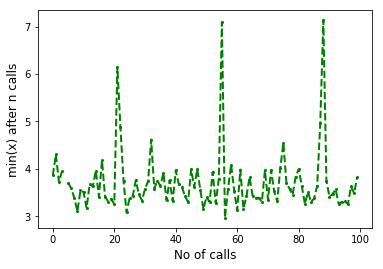

In [14]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1)#, figsize=(10,10))
xs = [t['tid'] for t in trials.trials]
ys = [t['result']['loss'] for t in trials.trials]
plt.plot(xs, ys, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=2)

ax.set_xlabel('No of calls', fontsize=12)
ax.set_ylabel('min(x) after n calls', fontsize=12)